# 1.Generate Powershell script 
Run python code below

In [1]:
# Global Constants
import os
data_directory='./data'
if not os.path.exists(data_directory):
    os.makedirs(data_directory)

In [2]:
# Constants
carGuidePrice="" # example "10-15" 
corpType=""
energyType=""
base="https://price.auto.sina.com.cn/api/PaihangbangSales/getSubSalesByParams?size=30"

def generateCommand(year="2023",month="01",page="1"):
    url=f'\"{base}&page={page}&year={year}&month={month}&carGuidePrice={carGuidePrice}&serialJiBie=&corpType={corpType}&ranliaoXingshi={energyType}&serial_id=&need_detail=1\"'

    fileName=f'{year}-{month}_{page}.json'
    command=f'curl {url} -o {fileName}'
    return command

In [3]:
## 1.1 crawl all data
# ii=0
# with open(f'{data_directory}/getJSON.ps1',"w") as f:
#     for year in ["2020","2021","2022","2023"]:
#         for month in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
#             if not ii:
#                 for i in range(1,30):
#                     print(generateCommand(year,month,page=i),file=f)
#             ii=(ii+1)%6

with open(f'{data_directory}/getJSON.ps1',"w") as f:
    for year in ["2020","2021","2022","2023"]:
        for month in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
            for i in range(1,30):
                print(generateCommand(year,month,page=i),file=f)             

In [4]:
## 1.2 crawl data in specific month
year='2023'
month='05'
with open(f'{data_directory}/getJSON-{year}-{month}.ps1',"w") as f:
    for i in range(30):
        print(generateCommand(year,month,page=i),file=f)

# 2.Crawl Data
run *./data/getJSON.ps1* or *./data/getJSON-{year}-{month}.ps1*
Right click and *Run With PowerShell*.
## Notice
Attention to crawling too fast!


# 3.Extract Data

In [5]:
import json
import pandas as pd

def extractData(filepath):
    with open(filepath,'r',encoding="utf8") as file:
        file_data=json.load(file)
        date = filepath.split('/')[-1].split('.')[0].split('_')[0]

        for i in range(len(file_data['data']['list'])):
            sub_brand_id=file_data['data']['list'][i]['sub_brand_id']
            serialZhName=file_data['data']['list'][i]['serial_info']['serialZhName']
    #         sales_volume_list=file_data['data']['list'][i]['qx_details']
            sales_volume=file_data['data']['list'][i]['sales_volume']
            
            if sub_brand_id in df_sales.columns:
                df_sales.loc[date, sub_brand_id] = sales_volume
            else:
                df_sales[sub_brand_id] = pd.Series(name=date, dtype=object, index=df_sales.index)
                df_sales.loc[date, sub_brand_id] = sales_volume
                df_info.loc['serialZhName', sub_brand_id]=serialZhName

In [6]:

df_sales = pd.DataFrame(index=pd.Index([], name='date'), columns=['sub_brand_id'])
df_info= pd.DataFrame(index=pd.Index([], name='info'), columns=['sub_brand_id'])
for filename in os.listdir(data_directory):
    if filename.endswith('.json'):
        filepath = f'{data_directory}/{filename}'
        extractData(filepath)

# 4.Postprocess
- fill null cell with 0

In [7]:
df_sales=df_sales.fillna(0)

In [8]:
df_info.head()

,sub_brand_id,428,549,776,492,573,814,410,2325,2884,...,5268,1856,4915,5449,5197,5351,5115,4595,5202,5204
info,,,,,,,,,,,,,,,,,,,,,
serialZhName,NaN,轩逸,朗逸,哈弗H6,卡罗拉,宝来,英朗,速腾,吉利博越,哈弗M6,...,哪吒GT,思域（进口）,理想L7,赛图斯,蓝电E5,家宝,奔腾M9,海鸥,逸达,豪越L


In [9]:
df_sales.head()

,sub_brand_id,428,549,776,492,573,814,410,2325,2884,...,5268,1856,4915,5449,5197,5351,5115,4595,5202,5204
date,,,,,,,,,,,,,,,,,,,,,
2020-01,0,50275,45836,37674,31392,30557,29328,28771,24735,21171,...,0,0,0,0,0,0,0,0,0,0
2020-02,0,4463,3547,3573,4206,2667,2128,2582,2379,1977,...,0,0,0,0,0,0,0,0,0,0
2020-03,0,24109,21713,15036,19396,17975,11421,16024,9290,8823,...,0,0,0,0,0,0,0,0,0,0
2020-04,0,32063,26712,17087,28406,21357,15969,19965,11890,9850,...,0,0,0,0,0,0,0,0,0,0
2020-05,0,43922,31294,19109,32964,23533,18660,23270,14169,11497,...,0,0,0,0,0,0,0,0,0,0


# 5.Plot


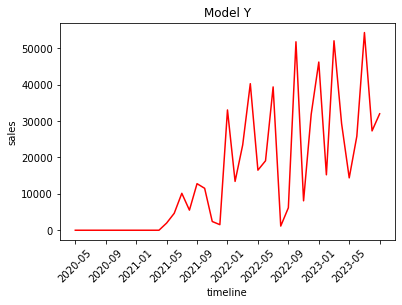

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.xlabel('timeline')
plt.ylabel('sales')

x=df_sales.index

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x[0::4])) 
plt.xticks(rotation=45)

y=df_sales['4281'].values
plt.title(df_info['4281']['serialZhName'])

plt.plot(x,y,color='r')
plt.show()

